In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib as mpl

In [2]:
#df = pd.read_csv("inlet_shear.csv")
df = pd.read_csv("shear_v4.csv")
X = df['X [ m ]'].to_numpy()
Y = df[' Y [ m ]'].to_numpy()
Z = df[' Z [ m ]'].to_numpy()
S = df[' Wall Shear [ Pa ]'].to_numpy()
Sx = df[' Wall Shear X [ Pa ]'].to_numpy()
Sy = df[' Wall Shear Y [ Pa ]'].to_numpy()
Sz = df[' Wall Shear Z [ Pa ]'].to_numpy()

In [3]:
theta = np.arctan2(X,Z)
L=np.max(Y)
r=.056

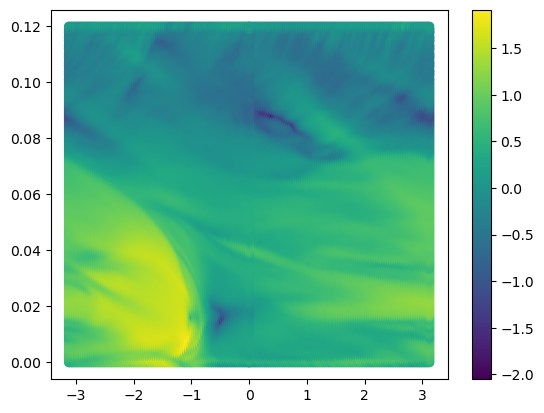

In [4]:
plt.scatter(theta, Y, c=np.log10(S), cmap=mpl.cm.viridis)
plt.colorbar()
plt.savefig("figs\\shear.svg",transparent=True)

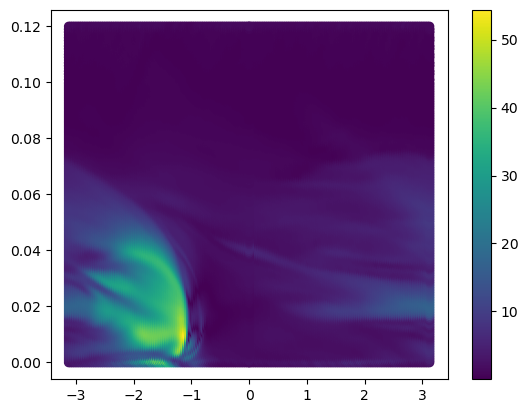

In [5]:
Sta = np.sqrt(Sx**2 + Sz**2)
plt.scatter(theta, Y, c=Sta, cmap=mpl.cm.viridis)
plt.colorbar()

C:\Users\david\AppData\Local\Temp\ipykernel_11716\800324062.py:1: RuntimeWarning: divide by zero encountered in true_divide
  St1 = Sz/X


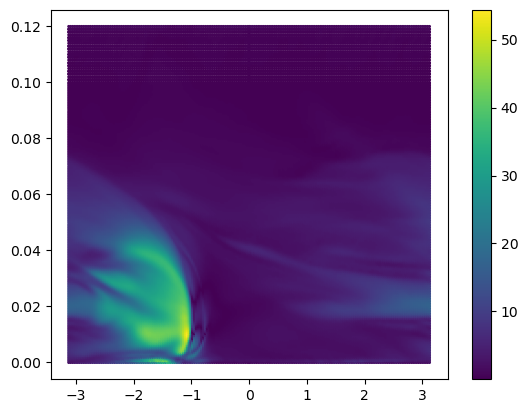

In [6]:
St1 = Sz/X
St2 = -Sx/Z
plt.scatter(theta, Y, c=Sta, cmap=mpl.cm.viridis, s=1.5)
plt.colorbar()

In [7]:
St = np.cross([X,Z],[Sx,Sz], axis=0)/r # Tangential shear


In [8]:
Tlocal = (St*r)
T = np.average(Tlocal) * (2*np.pi*r*L)


omega = 1000 * np.pi/30
W = T*omega
print("Average Tangential Shear:", np.average(St))
print("Torque:", T)
print("Power:", W)

Average Tangential Shear: 4.707172741152733
Torque: 0.011130054848047013
Power: 1.1655366181558653


Text(0.5, 1.0, 'Tangential Wall Shear (Pa)')

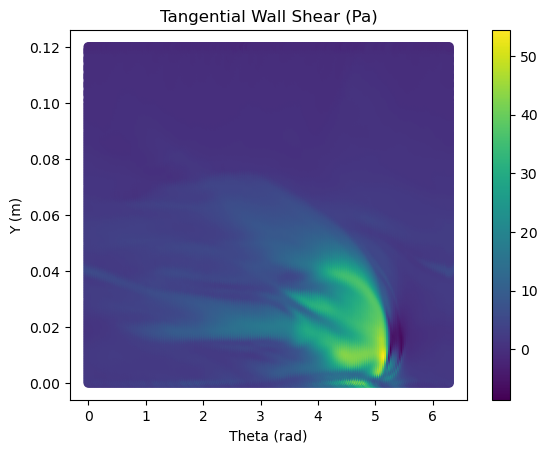

In [9]:
plt.scatter((theta+2*np.pi) % (2*np.pi), Y, c=St, cmap=mpl.cm.viridis)
plt.colorbar()
plt.xlabel("Theta (rad)")
plt.ylabel("Y (m)")
plt.title("Tangential Wall Shear (Pa)")


Text(0.5, 1.0, 'Axial Wall Shear (Pa)')

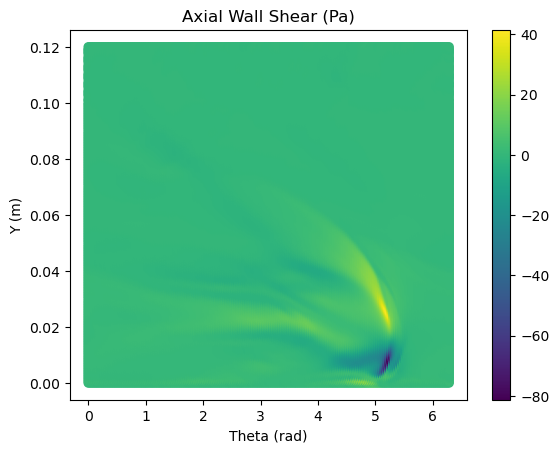

In [10]:
plt.scatter((theta+2*np.pi) % (2*np.pi), Y, c=Sy, cmap=mpl.cm.viridis)
plt.colorbar()
plt.xlabel("Theta (rad)")
plt.ylabel("Y (m)")
plt.title("Axial Wall Shear (Pa)")
